# Using merge_asof() to create dataset
The `merge_asof()` function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given `gdp`, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use `merge_asof()` to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables `gdp` and `recession` have been loaded for you.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path=r'/media/documentos/Cursos/Data Science/Python/Data_Science_Python/data_sets/'

gdp=pd.read_csv(path+'WorldBank_GDP.csv',usecols = ['Year','Country Name','GDP'])
gdp.rename(columns = {'Year':'date','Country Name':'country','Country Name':'country','GDP':'gdp'}, inplace = True)

print('gdp \n',gdp.head(),'\n')

recession=pd.read_csv(path+'recession.csv',parse_dates=['DATE'])

cond=[ (recession['ind']> 0) ,(recession['ind'] < 0) ]
val=['normal','recession']
recession['econ_status']=np.select(cond,val)
recession['date']=pd.DatetimeIndex(recession['DATE']).year
print('recession \n',recession.head(),'\n')

gdp 
          country  date           gdp
0          China  2010  6.087160e+12
1        Germany  2010  3.417090e+12
2          Japan  2010  5.700100e+12
3  United States  2010  1.499210e+13
4          China  2011  7.551500e+12 

recession 
         DATE  ind econ_status  date
0 1947-04-01 -1.0   recession  1947
1 1947-07-01 -0.8   recession  1947
2 1947-10-01  6.4      normal  1947
3 1948-01-01  6.2      normal  1948
4 1948-04-01  6.8      normal  1948 



- Using `merge_asof()`, merge `gdp` and `recession` on `date`, with `gdp` as the left table. Save to the variable `gdp_recession`.
- Create a `list` using a list comprehension and a conditional expression, named `is_recession`, where for each row if the `gdp_recession['econ_status']` value is equal to 'recession' then enter `'r'` else `'g'`.
- Using `gdp_recession`, plot a bar chart of `gdp` versus `date`, setting the `color` argument equal to `is_recession`.

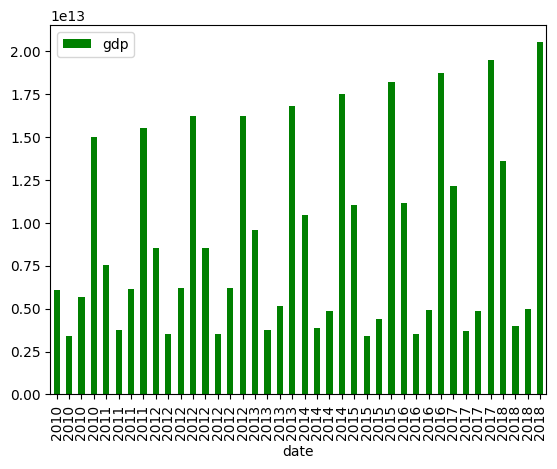

In [6]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp,recession,on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

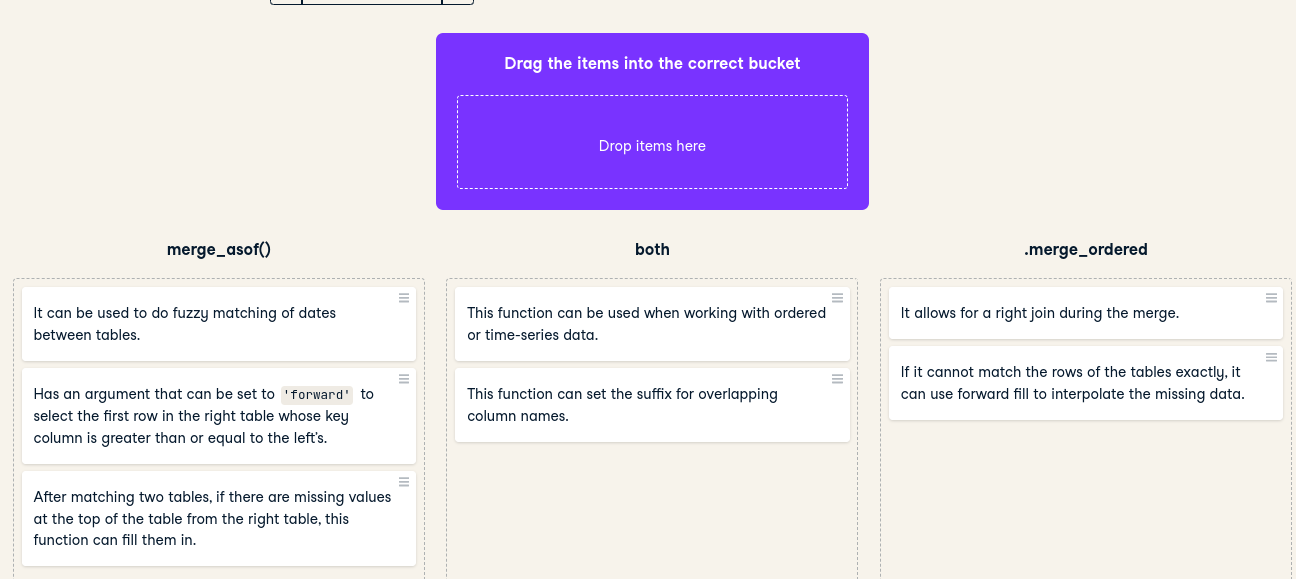